### Overall urban form within 1/2 mile (800 meters) of transit stations:
    Prepared by: Mohammed Golam Kaisar Hossain Bhuyan
    09-May-2025

    Objectives:
    Dividing stations into quadrants of eight(8) spatial development categories (octants) based on 3 features:
    - Number of buildings (Outer_TotalBuildings) > National Median Number of Buildings,
    - Building square footage (Outer_TotalFootprint) > National Median Building Footprint,
    - Average average building height (Outer_AvgHeight) > National Average Building Height

    Notes:
    Dividing stations into 8 distinct urban form categories as:
    High Count, High Footprint, Tall → Likely dense downtowns
    Low Count, Low Footprint, Short → Rural or underdeveloped areas
    Other mixes capture transitional zones like suburban corridors, industrial areas, etc.


### Analysis Summary

#### 0. Preparing data.

#### 1. Anlysis of Urban Form Typology with Median References:
    1.1 Pairwise 2D Quadrant Plots
    1.2 Station Count per Urban Form Typology
    1.3 3D Scatter Chart

#### 2. Analysis of Urban Form Typology by Transit Mode:
    2.1 Pairwise 2D Scatter Plot (Buildings and Footprints)
    2.2 Station Count per Urban Form Typology and Transit Mode
    2.3 Stacked bar plot
    2.4 Stacked bar plot with Filter

#### Setting up libraries

In [27]:
# pip install plotly

In [28]:
# pip install ipywidgets

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.graph_objects as go
import plotly.express as px


#### Loading files

In [4]:
# Load CSV
df = pd.read_csv("Final_Heighttest_with_footprints_output.csv")
df.head(2)

station_id                     StationName ntd_mode                 agency  \
0          36  ALAMEDA FERRY TERMINAL STATION    Ferry  Alameda/Oakland Ferry   
1          37  OAKLAND FERRY TERMINAL STATION    Ferry  Alameda/Oakland Ferry   

                           line_name       facility_type  Year built  \
0  Oakland / Alameda / San Francisco  Ferryboat Terminal      2023.0   
1  Oakland / Alameda / San Francisco  Ferryboat Terminal      1991.0   

   Square Feet   Latitude   Longitude  ... Outer_MaxHeight Outer_MinHeight  \
0          NaN  37.791197 -122.294188  ...             2.0             1.0   
1          NaN  37.795011 -122.279758  ...            15.0             1.0   

  Outer_AvgHeight Outer_BuildingsWithHeight Outer_TotalBuildings  \
0            1.50                         2                  350   
1            3.18                        84                  522   

   Outer_TotalFootprint  Outer_AvgFootprint  HasStepDown_Inner_Middle  \
0             138976.44              397.08                     False   
1             336870.94              645.35                     False   

   HasStepDown_Middle_Outer  ConsistentStepDown  
0                     False               False  
1                      True               False  

[2 rows x 39 columns]

#### Duplicate and Null value handling

In [5]:
# Checking duplicated rows : No Duplication
df.duplicated().sum()


0

In [6]:
# Checking null values : Null Value Exists
df.isna().sum()
# Check the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage[missing_percentage > 0]

Year built           0.262044
Square Feet         17.375529
Zip_Code             0.322516
Inner_MaxHeight     42.934892
Inner_MinHeight     42.934892
Inner_AvgHeight     42.934892
Middle_MaxHeight    34.126184
Middle_MinHeight    34.126184
Middle_AvgHeight    34.126184
Outer_MaxHeight     19.552510
Outer_MinHeight     19.552510
Outer_AvgHeight     19.552510
dtype: float64

In [7]:
# Missing Data Analysis
# Square Feet is missing in 17.4% of records.
# Inner (200m) building heights are missing in 43% of records.
# Middle (400m) building heights are missing in 34% of records.
# Outer (800m) building heights are missing in 19.5% of records.

# Handling Missing Values
# Square Feet: Missing values are imputed using the median (to avoid outlier influence).
# Building Heights (Inner, Middle, Outer): Considering missing values is "no buildings," filled with 0.
# Year built and Zip_Code missing values are not significant for this analysis.

In [8]:
# Fill missing values in Square Feet with median data
df['Square Feet'] = df['Square Feet'].fillna(df['Square Feet'].median())

# Fill missing building height values with 0 (assuming missing means no buildings)
height_columns = ['Inner_MaxHeight', 'Inner_MinHeight', 'Inner_AvgHeight',
                  'Middle_MaxHeight', 'Middle_MinHeight', 'Middle_AvgHeight',
                  'Outer_MaxHeight', 'Outer_MinHeight', 'Outer_AvgHeight']

df[height_columns] = df[height_columns].fillna(0)

# # Verify missing values are handled
# df.isnull().sum()  # Should return 0 if all missing values are filled


#### Cleaning up column names for visual representation

In [9]:
# Dataframe copy for processing
df_copy = df.copy(deep=True)
# df_copy.head()

# Rename columns for clarity
df_copy.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df_copy.columns

Index(['station_id', 'StationName', 'ntd_mode', 'agency', 'line_name',
       'facility_type', 'Year_built', 'Square_Feet', 'Latitude', 'Longitude',
       'full_address', 'City', 'State', 'County', 'Zip_Code',
       'Inner_MaxHeight', 'Inner_MinHeight', 'Inner_AvgHeight',
       'Inner_BuildingsWithHeight', 'Inner_TotalBuildings',
       'Inner_TotalFootprint', 'Inner_AvgFootprint', 'Middle_MaxHeight',
       'Middle_MinHeight', 'Middle_AvgHeight', 'Middle_BuildingsWithHeight',
       'Middle_TotalBuildings', 'Middle_TotalFootprint', 'Middle_AvgFootprint',
       'Outer_MaxHeight', 'Outer_MinHeight', 'Outer_AvgHeight',
       'Outer_BuildingsWithHeight', 'Outer_TotalBuildings',
       'Outer_TotalFootprint', 'Outer_AvgFootprint',
       'HasStepDown_Inner_Middle', 'HasStepDown_Middle_Outer',
       'ConsistentStepDown'],
      dtype='object')

### 1.1 Urban Form Typology with Median References: Pairwise 2D Quadrant Plots
    

In [10]:
    # Building Count vs Building Avg Height
    # Building Count vs Building Footprint
    # Building Footprint vs Building Height

In [13]:
# Keep only relevant columns

df1 = df_copy[['Outer_TotalBuildings', 'Outer_TotalFootprint', 'Outer_AvgHeight']].dropna()

# Compute national medians
median_buildings = df1['Outer_TotalBuildings'].median()
median_footprint = df1['Outer_TotalFootprint'].median()
median_height = df1['Outer_AvgHeight'].median()

# Create category labels for each octant
def categorize(row):
    b = row['Outer_TotalBuildings'] > median_buildings
    f = row['Outer_TotalFootprint'] > median_footprint
    h = row['Outer_AvgHeight'] > median_height
    return f"{'Higher' if b else 'Lower'} Building Count, {'Higher' if f else 'Lower'} Footprint, {'Higher' if h else 'Lower'} Height"

df1['Category'] = df1.apply(categorize, axis=1)


# Create a dictionary to map old values to new values
mapping_dict = {
    'Lower Building Count, Lower Footprint, Lower Height': 'Category 1 – Underbuilt',
    'Lower Building Count, Lower Footprint, Higher Height': 'Category 2 – Vertical Outliers',
    'Lower Building Count, Higher Footprint, Lower Height': 'Category 3 – Spread-Low Density',
    'Lower Building Count, Higher Footprint, Higher Height': 'Category 4 – Vertical Campuses',
    'Higher Building Count, Lower Footprint, Lower Height': 'Category 5 – Compact Low-Rise',
    'Higher Building Count, Lower Footprint, Higher Height': 'Category 6 – Compact Vertical',
    'Higher Building Count, Higher Footprint, Lower Height': 'Category 7 – Sprawling Mid-Density',
    'Higher Building Count, Higher Footprint, Higher Height': 'Category 8 – Urban Core'
}

# Rename the values in the 'Category' column using the mapping dictionary
df1['Category'] = df1['Category'].map(mapping_dict)

# # Display the updated DataFrame (optional)
# print(df1)

colors = sns.color_palette("Set2", df1['Category'].nunique())
category_colors = dict(zip(df1['Category'].unique(), colors))


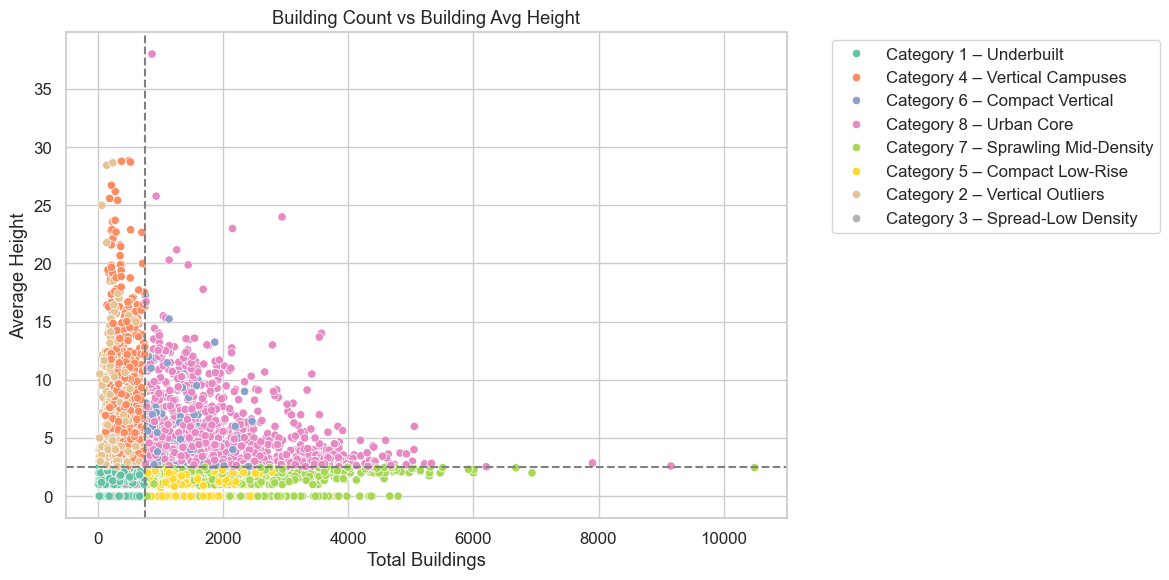

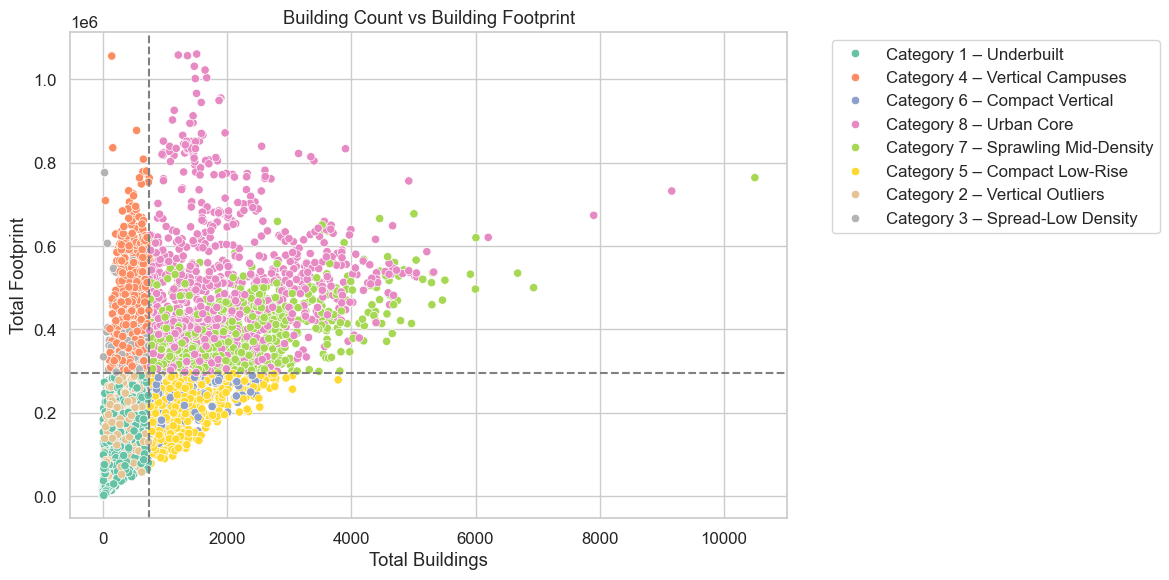

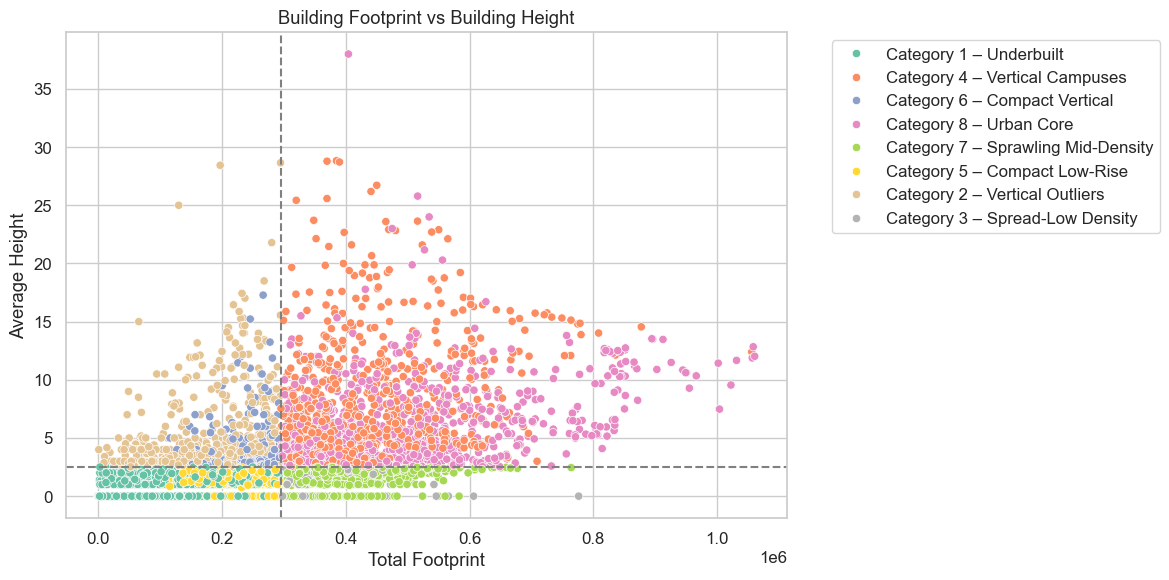

In [14]:
# Set up for clean visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


# 2D scatter: Buildings vs Height
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='Outer_TotalBuildings', y='Outer_AvgHeight', hue='Category', palette=category_colors)
plt.axvline(median_buildings, color='gray', linestyle='--')
plt.axhline(median_height, color='gray', linestyle='--')
plt.title('Building Count vs Building Avg Height')
plt.xlabel('Total Buildings')
plt.ylabel('Average Height')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2D scatter: Buildings vs Footprint
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='Outer_TotalBuildings', y='Outer_TotalFootprint', hue='Category', palette=category_colors)
plt.axvline(median_buildings, color='gray', linestyle='--')
plt.axhline(median_footprint, color='gray', linestyle='--')
plt.title('Building Count vs Building Footprint')
plt.xlabel('Total Buildings')
plt.ylabel('Total Footprint')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2D scatter: Footprint vs Height
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='Outer_TotalFootprint', y='Outer_AvgHeight', hue='Category', palette=category_colors)
plt.axvline(median_footprint, color='gray', linestyle='--')
plt.axhline(median_height, color='gray', linestyle='--')
plt.title('Building Footprint vs Building Height')
plt.xlabel('Total Footprint')
plt.ylabel('Average Height')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### 1.2 Urban Form Typology with Median References: Station Count per Urban Form Typology


In [15]:
# Count of stations per urban form typology
summary = df1['Category'].value_counts().reset_index()
summary.columns = ['Urban Form Around Transit Stations Typology', 'Station Count']
summary.to_csv('Station Count per Urban Form Typology.csv', index=False)
print(summary)


  Urban Form Around Transit Stations Typology  Station Count
0                     Category 1 – Underbuilt           1157
1                     Category 8 – Urban Core            992
2              Category 4 – Vertical Campuses            721
3          Category 7 – Sprawling Mid-Density            678
4               Category 5 – Compact Low-Rise            580
5              Category 2 – Vertical Outliers            514
6               Category 6 – Compact Vertical            230
7             Category 3 – Spread-Low Density             89


### 1.3 Urban Form Typology with Median References: 3D Scatter Chart


In [17]:

# Calculate medians
median_buildings = df1['Outer_TotalBuildings'].median()
median_footprint = df1['Outer_TotalFootprint'].median()
median_height = df1['Outer_AvgHeight'].median()

# Scatter plot of the station data
scatter = go.Scatter3d(
    x=df1['Outer_TotalBuildings'],
    y=df1['Outer_TotalFootprint'],
    z=df1['Outer_AvgHeight'],
    mode='markers',
    marker=dict(
        size=5,
        color=df1['Category'].astype('category').cat.codes,  # Assign color per category
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Category Code')
    ),
    text=df1['StationName'] if 'StationName' in df1.columns else None,
    hovertemplate="<b>%{text}</b><br>Buildings: %{x}<br>Footprint: %{y}<br>Height: %{z}<extra></extra>"
)

# Reference median planes
median_planes = [
    # YZ plane (median for buildings)
    go.Surface(
        z=[[df1['Outer_AvgHeight'].min(), df1['Outer_AvgHeight'].max()],
           [df1['Outer_AvgHeight'].min(), df1['Outer_AvgHeight'].max()]],
        y=[[df1['Outer_TotalFootprint'].min(), df1['Outer_TotalFootprint'].min()],
           [df1['Outer_TotalFootprint'].max(), df1['Outer_TotalFootprint'].max()]],
        x=[[median_buildings, median_buildings], [median_buildings, median_buildings]],
        showscale=False,
        opacity=0.2,
        name='Median Buildings'
    ),
    # XZ plane (median for footprint)
    go.Surface(
        z=[[df1['Outer_AvgHeight'].min(), df1['Outer_AvgHeight'].max()],
           [df1['Outer_AvgHeight'].min(), df1['Outer_AvgHeight'].max()]],
        y=[[median_footprint, median_footprint], [median_footprint, median_footprint]],
        x=[[df1['Outer_TotalBuildings'].min(), df1['Outer_TotalBuildings'].max()],
           [df1['Outer_TotalBuildings'].min(), df1['Outer_TotalBuildings'].max()]],
        showscale=False,
        opacity=0.2,
        name='Median Footprint'
    ),
    # XY plane (median for height)
    go.Surface(
        z=[[median_height, median_height], [median_height, median_height]],
        y=[[df1['Outer_TotalFootprint'].min(), df1['Outer_TotalFootprint'].max()],
           [df1['Outer_TotalFootprint'].min(), df1['Outer_TotalFootprint'].max()]],
        x=[[df1['Outer_TotalBuildings'].min(), df1['Outer_TotalBuildings'].min()],
           [df1['Outer_TotalBuildings'].max(), df1['Outer_TotalBuildings'].max()]],
        showscale=False,
        opacity=0.2,
        name='Median Height'
    )
]

# Combine all traces
fig = go.Figure(data=[scatter] + median_planes)

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title='Total Buildings',
        yaxis_title='Total Footprint',
        zaxis_title='Average Height'
    ),
    title='3D Urban Form Typology with Median Reference Planes',
    height=700
)

fig.show()


### 2.1 Analysis of Urban Form Typology by Transit Mode: Pairwise 2D Scatter Plot (Buildings and Footprints)


In [22]:
# Keep only relevant columns

df2 = df_copy[['Outer_TotalBuildings', 'Outer_TotalFootprint', 'Outer_AvgHeight', 'ntd_mode']].dropna()

# Compute national medians
median_buildings = df2['Outer_TotalBuildings'].median()
median_footprint = df2['Outer_TotalFootprint'].median()
median_height = df2['Outer_AvgHeight'].median()

# Create category labels for each octant
def categorize(row):
    b = row['Outer_TotalBuildings'] > median_buildings
    f = row['Outer_TotalFootprint'] > median_footprint
    h = row['Outer_AvgHeight'] > median_height
    return f"{'Higher' if b else 'Lower'} Building Count, {'Higher' if f else 'Lower'} Footprint, {'Higher' if h else 'Lower'} Height"

df2['Category'] = df2.apply(categorize, axis=1)


# Create a dictionary to map old values to new values
mapping_dict = {
    'Lower Building Count, Lower Footprint, Lower Height': 'Category 1 – Underbuilt',
    'Lower Building Count, Lower Footprint, Higher Height': 'Category 2 – Vertical Outliers',
    'Lower Building Count, Higher Footprint, Lower Height': 'Category 3 – Spread-Low Density',
    'Lower Building Count, Higher Footprint, Higher Height': 'Category 4 – Vertical Campuses',
    'Higher Building Count, Lower Footprint, Lower Height': 'Category 5 – Compact Low-Rise',
    'Higher Building Count, Lower Footprint, Higher Height': 'Category 6 – Compact Vertical',
    'Higher Building Count, Higher Footprint, Lower Height': 'Category 7 – Sprawling Mid-Density',
    'Higher Building Count, Higher Footprint, Higher Height': 'Category 8 – Urban Core'
}

# Rename the values in the 'Category' column using the mapping dictionary
df2['Category'] = df2['Category'].map(mapping_dict)


colors = sns.color_palette("Set2", df2['Category'].nunique())
category_colors = dict(zip(df2['Category'].unique(), colors))


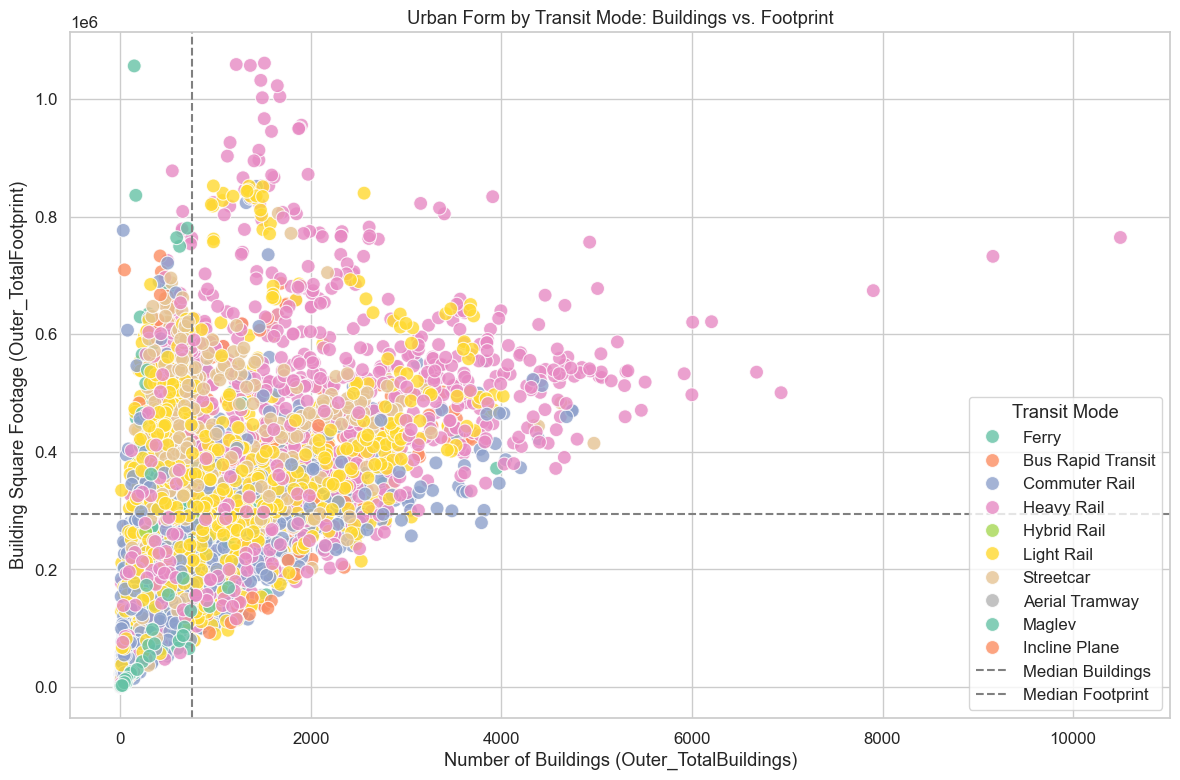

In [23]:
# Create the scatter plot

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df2,
    x='Outer_TotalBuildings',
    y='Outer_TotalFootprint',
    hue='ntd_mode',  # This column should exist
    palette='Set2',
    s=100,
    alpha=0.8
)

# Draw median lines
plt.axvline(median_buildings, color='gray', linestyle='--', linewidth=1.5, label='Median Buildings')
plt.axhline(median_footprint, color='gray', linestyle='--', linewidth=1.5, label='Median Footprint')

# Customize plot
plt.title('Urban Form by Transit Mode: Buildings vs. Footprint')
plt.xlabel('Number of Buildings (Outer_TotalBuildings)')
plt.ylabel('Building Square Footage (Outer_TotalFootprint)')
plt.legend(title='Transit Mode')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.2 Analysis of Urban Form Typology by Transit Mode: Station Count per Urban Form Typology and Transit Mode

In [30]:
# Group by Urban Form Typology and Transit Mode
summary_by_mode = df2.groupby(['ntd_mode', 'Category']).size().reset_index(name='Station Count')

# Pivot for better readability (optional)
pivot_summary = summary_by_mode.pivot(index='ntd_mode', columns='Category', values='Station Count').fillna(0).astype(int)

pivot_summary.to_csv('Station Count per Urban Form Typology and Transit Mode.csv', index=False)
print(pivot_summary)


Category           Category 1 – Underbuilt  Category 2 – Vertical Outliers  \
ntd_mode                                                                     
Aerial Tramway                           0                               1   
Bus Rapid Transit                       83                              63   
Commuter Rail                          601                             131   
Ferry                                   80                              43   
Heavy Rail                              69                              72   
Hybrid Rail                             20                               2   
Incline Plane                            0                               0   
Light Rail                             234                             107   
Maglev                                   2                               9   
Streetcar                               68                              86   

Category           Category 3 – Spread-Low Density  \
ntd_mode 

### 2.3 Analysis of Urban Form Typology by Transit Mode: Stacked bar plot


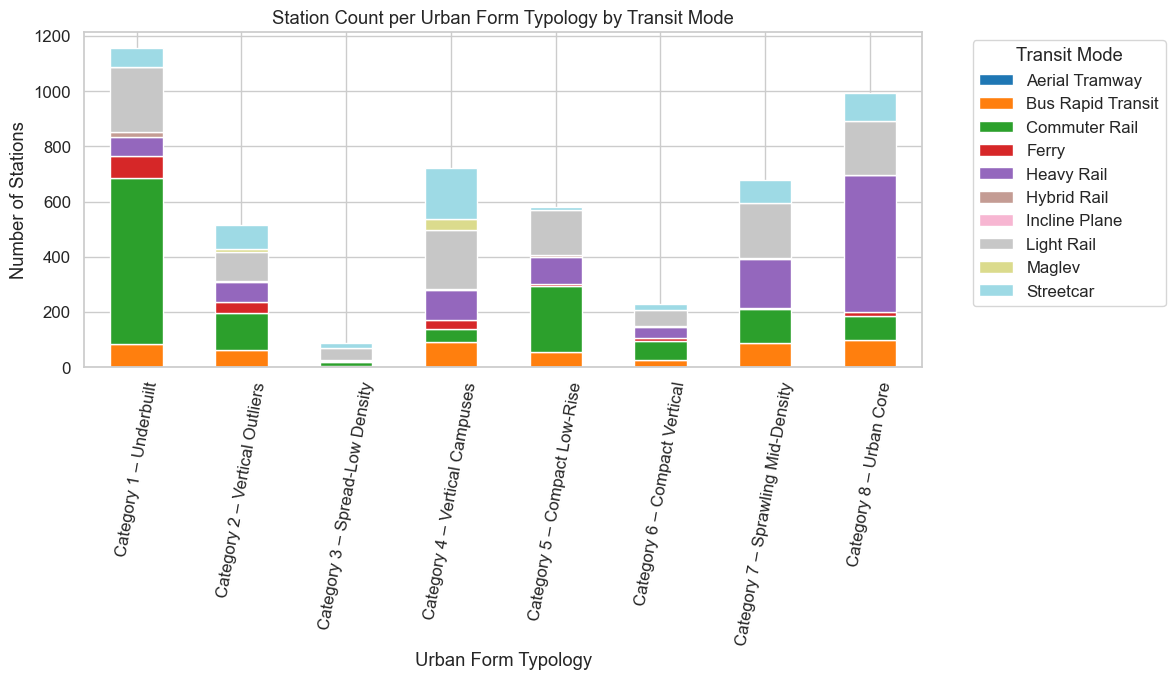

In [25]:
# Stacked bar plot of Urban Form Typology by Transit Mode
pivot_summary.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Station Count per Urban Form Typology by Transit Mode')
plt.xlabel('Urban Form Typology')
plt.ylabel('Number of Stations')
plt.legend(title='Transit Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


### 2.4 Analysis of Urban Form Typology by Transit Mode: Stacked bar plot with Filter

In [26]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

# # Filter by Transit Mode and Urban Forms

# # Dropdown options
# transit_modes = df2['ntd_mode'].dropna().unique().tolist()
# urban_forms = df2['Category'].dropna().unique().tolist()

# # Interactive function
# @interact(
#     transit_mode=widgets.Dropdown(options=transit_modes + ['All'], description='Transit Mode:'),
#     urban_form=widgets.Dropdown(options=urban_forms + ['All'], description='Urban Form:')
# )
# def filter_plot(transit_mode='All', urban_form='All'):
#     # Apply filters
#     filtered_df = df2.copy()
#     if transit_mode != 'All':
#         filtered_df = filtered_df[filtered_df['ntd_mode'] == transit_mode]
#     if urban_form != 'All':
#         filtered_df = filtered_df[filtered_df['Category'] == urban_form]

#     # Recalculate summary
#     summary = filtered_df.groupby(['Category', 'ntd_mode']).size().reset_index(name='Station Count')
#     pivot_summary = summary.pivot(index='Category', columns='ntd_mode', values='Station Count').fillna(0)

#     # Plot
#     if not pivot_summary.empty:
#         pivot_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
#         plt.title('Filtered Urban Form Typology by Transit Mode')
#         plt.xlabel('Urban Form Typology')
#         plt.ylabel('Number of Stations')
#         plt.legend(title='Transit Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.tight_layout()
#         plt.show()
#     else:
#         print("No data available for selected filter.")


# Filter by Transit Mode Only

# Get unique transit modes and add an "All" option
transit_modes = df2['ntd_mode'].dropna().unique().tolist()
transit_modes.sort()
transit_modes.insert(0, 'All')  # Add 'All' option

# Define interactive function
@interact(transit_mode=widgets.Dropdown(options=transit_modes, description='Transit Mode:'))
def filter_by_transit(transit_mode='All'):
    # Apply filter
    if transit_mode == 'All':
        filtered_df = df2.copy()
    else:
        filtered_df = df2[df2['ntd_mode'] == transit_mode]

    # Count stations per Urban Form Typology
    summary = filtered_df['Category'].value_counts().reset_index()
    summary.columns = ['Urban Form Typology', 'Station Count']

    # Plot
    if not summary.empty:
        summary.plot(kind='bar', x='Urban Form Typology', y='Station Count',
                     color='skyblue', figsize=(12, 7), legend=False)
        plt.title(f"Urban Form Typology Count - {transit_mode}")
        plt.xlabel("Urban Form Typology")
        plt.ylabel("Station Count")
        plt.xticks(rotation=80)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for this transit mode.")



interactive(children=(Dropdown(description='Transit Mode:', options=('All', 'Aerial Tramway', 'Bus Rapid Trans…

In [1]:
# End